<a href="https://colab.research.google.com/github/qianjing2020/DS-Unit-4-Sprint-3-Deep-Learning/blob/master/JingQian_Assignment_432_Convolution_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 3 Assignment 2*
# Convolutional Neural Networks (CNNs)

# Assignment

- <a href="#p1">Part 1:</a> Pre-Trained Model
- <a href="#p2">Part 2:</a> Custom CNN Model
- <a href="#p3">Part 3:</a> CNN with Data Augmentation


You will apply three different CNN models to a binary image classification model using Keras. Classify images of Mountains (`./data/train/mountain/*`) and images of forests (`./data/train/forest/*`). Treat mountains as the positive class (1) and the forest images as the negative (zero). 

|Mountain (+)|Forest (-)|
|---|---|
|![](./data/train/mountain/art1131.jpg)|![](./data/validation/forest/cdmc317.jpg)|

The problem is relatively difficult given that the sample is tiny: there are about 350 observations per class. This sample size might be something that you can expect with prototyping an image classification problem/solution at work. Get accustomed to evaluating several different possible models.

# Pre - Trained Model
<a id="p1"></a>

Load a pretrained network from Keras, [ResNet50](https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1) - a 50 layer deep network trained to recognize [1000 objects](https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt). Starting usage:

```python
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model # This is the functional API

resnet = ResNet50(weights='imagenet', include_top=False)

```

The `include_top` parameter in `ResNet50` will remove the full connected layers from the ResNet model. The next step is to turn off the training of the ResNet layers. We want to use the learned parameters without updating them in future training passes. 

```python
for layer in resnet.layers:
    layer.trainable = False
```

Using the Keras functional API, we will need to additional additional full connected layers to our model. We we removed the top layers, we removed all preivous fully connected layers. In other words, we kept only the feature processing portions of our network. You can expert with additional layers beyond what's listed here. The `GlobalAveragePooling2D` layer functions as a really fancy flatten function by taking the average of each of the last convolutional layer outputs (which is two dimensional still). 

```python
x = resnet.output
x = GlobalAveragePooling2D()(x) # This layer is a really fancy flatten
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)
model = Model(resnet.input, predictions)
```

Your assignment is to apply the transfer learning above to classify images of Mountains (`./data/train/mountain/*`) and images of forests (`./data/train/forest/*`). Treat mountains as the positive class (1) and the forest images as the negative (zero). 

Steps to complete assignment: 
1. Load in Image Data into numpy arrays (`X`) 
2. Create a `y` for the labels
3. Train your model with pre-trained layers from resnet
4. Report your model's accuracy

## Load in Data

This surprisingly more difficult than it seems, because you are working with directories of images instead of a single file. This boiler plate will help you download a zipped version of the directory of images. The directory is organized into "train" and "validation" which you can use inside an `ImageGenerator` class to stream batches of images thru your model.  


### Download & Summarize the Data

This step is completed for you. Just run the cells and review the results. 

In [0]:
import tensorflow as tf
import os

_URL = 'https://github.com/LambdaSchool/DS-Unit-4-Sprint-3-Deep-Learning/blob/master/module2-convolutional-neural-networks/data.zip?raw=true'
path_to_zip = tf.keras.utils.get_file(fname='data.zip', origin=_URL, extract=True)
# keras.utils.get_file: return the Path to the downloaded file 
# By default the file at the url origin is downloaded to the cache_dir ~/.keras, placed in the cache_subdir datasets

PATH = os.path.join(os.path.dirname(path_to_zip), 'data')

print(path_to_zip)
PATH

In [0]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [0]:
# directories for train/val mountin/forest pics
train_mountain_dir = os.path.join(train_dir, 'mountain')  
train_forest_dir = os.path.join(train_dir, 'forest')  
validation_mountain_dir = os.path.join(validation_dir, 'mountain')  
validation_forest_dir = os.path.join(validation_dir, 'forest')  

In [6]:
# check the file list
filelist = os.listdir(validation_forest_dir) 
# it actually has some hidden file like ". DS_store", '.ipynb_checkpoints', are we gonna just leave it there?
print(', '.join(map(str, filelist)))

cdmc556.jpg, cdmc338.jpg, cdmc415.jpg, natc52.jpg, cdmc12.jpg, cdmc562.jpg, bost101.jpg, cdmc271.jpg, cdmc331.jpg, cdmc348.jpg, natc37.jpg, cdmc363.jpg, cdmc290.jpg, cdmc352.jpg, cdmc317.jpg, cdmc292.jpg, natc49.jpg, cdmc368.jpg, cdmc278.jpg, cdmc280.jpg, cdmc547.jpg, bost103.jpg, .DS_Store, cdmc306.jpg, bost190.jpg, cdmc315.jpg, .ipynb_checkpoints, cdmc430.jpg, nat1266.jpg, cdmc388.jpg, bost98.jpg, cdmc313.jpg, cdmc533.jpg, cdmc293.jpg, cdmc282.jpg, cdmc333.jpg, natc12.jpg, cdmc319.jpg, cdmc318.jpg, cdmc375.jpg, cdmc291.jpg, cdmc277.jpg, natc13.jpg, cdmc101.jpg, cdmc283.jpg, cdmc284.jpg, cdmc281.jpg, cdmc451.jpg, natc4.jpg, cdmc414.jpg, bost102.jpg, cdmc377.jpg, bost100.jpg, cdmc458.jpg, cdmc344.jpg, n18075.jpg, cdmc358.jpg, cdmc494.jpg, cdmc351.jpg, cdmc507.jpg, cdmc385.jpg, cdmc359.jpg


['n213031.jpg', 'n213009.jpg', 'n405030.jpg', 'n213095.jpg', 'n255008.jpg', 'cdmc184.jpg', 'n213092.jpg', 'n18028.jpg', 'n219008.jpg', 'n18023.jpg', 'n344047.jpg', 'n213094.jpg', 'n371066.jpg', 'n219015.jpg', 'n736023.jpg', 'n213085.jpg', 'n44062.jpg', 'n266018.jpg', 'n860054.jpg', 'n213065.jpg', 'n44003.jpg', 'n199073.jpg', 'n213080.jpg', 'n44009.jpg', 'n18044.jpg', 'n213097.jpg', 'n213096.jpg', 'n44002.jpg', 'n344059.jpg', 'n344019.jpg', 'n295018.jpg', 'n841058.jpg', 'n213034.jpg', 'n213056.jpg', 'n632073.jpg', 'n213005.jpg', 'n199031.jpg', 'n18021.jpg', 'cdmc187.jpg', 'n18039.jpg', 'n736029.jpg', 'n213007.jpg', 'n344082.jpg', 'n213081.jpg', 'n860034.jpg', 'n199080.jpg', 'n405023.jpg', 'n295039.jpg', 'n737027.jpg', 'n736026.jpg', 'n213021.jpg', 'n531080.jpg', 'n255068.jpg', 'n18009.jpg', 'n371071.jpg', 'n295042.jpg', 'n266020.jpg', 'n213086.jpg', 'n219006.jpg', 'n18022.jpg', 'n347078.jpg', 'n18036.jpg', 'n371063.jpg', 'n213098.jpg', 'n347051.jpg', 'n199015.jpg', 'n199004.jpg', 'n2130

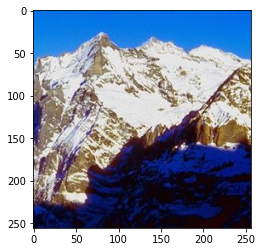

In [7]:
import imageio
import matplotlib.pyplot as plt
from skimage import color, io
from skimage.exposure import rescale_intensity

myPath = validation_mountain_dir
img_filename = []
for file in os.listdir(myPath):
    if file.endswith(".jpg"):
        img_filename.append(file)
print(img_filename)
print('The number of image file in', myPath, 'is', len(img_filename))

img_file = myPath + '/' + img_filename[0]
img = imageio.imread(img_file)
plt.imshow(img);
print(f'Image dimension ={img.shape}')

In [0]:
# this cell overestimated the number of images in each folder by 2 (2 hidden files)

num_mountain_tr = len(os.listdir(train_mountain_dir))
num_forest_tr = len(os.listdir(train_forest_dir))

num_mountain_val = len(os.listdir(validation_mountain_dir))
num_forest_val = len(os.listdir(validation_forest_dir))

total_train = num_mountain_tr + num_forest_tr
total_val = num_mountain_val + num_forest_val

print('total training mountain images:', num_mountain_tr)
print('total training forest images:', num_forest_tr)
print('total validation mountain images:', num_mountain_val)
print('total validation forest images:', num_forest_val)
print("--------"*3)
print("Total training images:", total_train)
print("Total validation images:", total_val)

In [9]:
# We can also use glob to find the right number of image files in those folder
from glob import glob

folders = [train_mountain_dir, train_forest_dir, validation_mountain_dir, validation_forest_dir]
for folder in folders:
  img_files = folder+'/*.jpg'
  num_img =  len(glob(img_files))
  print('Number of JPG files in', folder, ': ',num_img)

Number of JPG files in /root/.keras/datasets/data/train/mountain :  252
Number of JPG files in /root/.keras/datasets/data/train/forest :  268
Number of JPG files in /root/.keras/datasets/data/validation/mountain :  122
Number of JPG files in /root/.keras/datasets/data/validation/forest :  60


### Keras `ImageGenerator` to Process the Data

This step is completed for you, but please review the code. The `ImageGenerator` class reads in batches of data from a directory and pass them to the model one batch at a time. Just like large text files, this method is advantageous, because it stifles the need to load a bunch of images into memory. 

Check out the documentation for this class method: [Keras `ImageGenerator` Class](https://keras.io/preprocessing/image/#imagedatagenerator-class). You'll expand it's use in the third assignment objective.

In [0]:
batch_size = 16
epochs = 50
IMG_HEIGHT = 256 #224
IMG_WIDTH = 256 #224
CHNLS = 3 # this refers to the R, G, B channels

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Generate batches of tensor image data with real-time data augmentation. 
# The data will be looped over (in batches).
train_image_generator = ImageDataGenerator(rescale=1/256) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1/256) # Generator for our validation data


In [0]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),# reshape image
                                                           class_mode='binary'#return label array as 1D binary labels                                                           ) 
)
# Takes the path to a directory & generates batches of augmented data

In [0]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

## Instatiate Model

In [0]:
import numpy as np

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
# Keras Applications are deep learning models that are made available alongside pre-trained weights.

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

resnet = ResNet50(weights='imagenet', include_top=False)
#include_top: whether to include the fully-connected layer at the top of the network.

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional layers
for layer in resnet.layers:
  layer.trainable = False

x = resnet.output
# add a global spatial average pooling layer
x = GlobalAveragePooling2D()(x) 
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 1 class
predictions = Dense(1, activation='sigmoid')(x)

# this is the model we will train
model = Model(resnet.input, predictions)  

In [0]:
resnet.summary()

In [0]:
model.summary()
# by comparision, model has two 1 pooling layer and 2 dense layer appended on resnet model

In [0]:
model.compile(optimizer='nadam', loss='binary_crossentropy', metrics =['accuracy'])

## Fit Model

In [0]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size, #Total number of steps (batches of samples) for one epoch 
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

# Custom CNN Model

In this step, write and train your own convolutional neural network using Keras. You can use any architecture that suits you as long as it has at least one convolutional and one pooling layer at the beginning of the network - you can add more if you want. 

In [0]:
# Define the Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping

custom_cnn = Sequential([Conv2D(64, (3,3), input_shape=(256, 256, 3), padding='same', activation='relu'),
                         # conv2D(output depth, kernel size, 
                         #padding='same' means the output will the same length as the original input.)
                         
                         MaxPooling2D(pool_size=(2,2), padding='same'), 
                         #pool_size: factors by which to downscale (vertical, horizontal).
                         #(2, 2) will halve the input in both spatial dimension. 
                         
                         Conv2D(32, (3,3), activation='relu'),
                         MaxPooling2D((2,2)),
                         
                         Conv2D(16, (3,3), activation='relu'),
                         MaxPooling2D((2,2)),
                         
                         Conv2D(8, (2,2),activation='relu'),
                         MaxPooling2D((2,2)),
                         
                         Conv2D(8, (2,2), padding='same', activation='relu'),
                         Flatten(),
                         Dense(64, activation='relu'),                         
                         Dense(1, activation='sigmoid')
                        ])

In [0]:
# Compile Model
custom_cnn.compile(optimizer ='nadam', loss='binary_crossentropy', metrics=['accuracy'] )

In [0]:
# Fit Model
history = custom_cnn.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

In [0]:
# visualization
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Custom CNN Model with Image Manipulations

To simulate an increase in a sample of image, you can apply image manipulation techniques: cropping, rotation, stretching, etc. Luckily Keras has some handy functions for us to apply these techniques to our mountain and forest example. Simply, you should be able to modify our image generator for the problem. Check out these resources to help you get started: 

1. [Keras `ImageGenerator` Class](https://keras.io/preprocessing/image/#imagedatagenerator-class)
2. [Building a powerful image classifier with very little data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)

Jing: note that this is one of the following __regularization technique__ for CNN
* Add Dropout 
* Batch Normalization
* Data augamentation (add images by doing this to original images: flip, rotate, random crop, scale, color jitter, contrast, brightness...)
* Drop connect
* Fractional max pooling
* stochastic depth (randomly drop layers)
 

In [0]:
# generator for our training data
train_image_generator = ImageDataGenerator(rescale=1/255,
                                           featurewise_center=True,
                                           featurewise_std_normalization=True,
                                           rotation_range =20,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           horizontal_flip=True
                                           )

# generator for our validation data
validation_image_generator = ImageDataGenerator(rescale=1./255,
                                           featurewise_center=True,
                                           featurewise_std_normalization=True,
                                           rotation_range =20,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           horizontal_flip=True
                                           )

In [33]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle = True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=validation_dir,
                                                           shuffle = True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 533 images belonging to 2 classes.
Found 195 images belonging to 2 classes.


In [0]:
custom_cnn = Sequential([
                         Conv2D(64, (3,3), input_shape=(256, 256, 3), padding='same', activation='relu'),
                         MaxPooling2D((2,2), padding='same'),  
                         Conv2D(32, (3,3), activation='relu'),
                         MaxPooling2D((2,2)),
                         Conv2D(8, (3,3), activation='relu'),
                         MaxPooling2D((2,2)),
                         Conv2D(8, (2,2),activation='relu'),
                         MaxPooling2D((2,2)),
                         Conv2D(8, (2,2), padding='same', activation='relu'),
                         Flatten(),
                         Dense(64, activation='relu'),
                         Dense(1, activation='sigmoid')
                        ])


In [0]:
custom_cnn.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
# Fit Model
history = custom_cnn.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
32/32 [==============================] - 11s 338ms/step - loss: 0.5482 - accuracy: 0.7090 - val_loss: 0.4197 - val_accuracy: 0.8466
Epoch 2/50
32/32 [==============================] - 10s 325ms/step - loss: 0.3331 - accuracy: 0.8743 - val_loss: 0.3173 - val_accuracy: 0.8221
Epoch 3/50
32/32 [==============================] - 10s 324ms/step - loss: 0.3268 - accuracy: 0.8743 - val_loss: 0.3404 - val_accuracy: 0.8466
Epoch 4/50
32/32 [==============================] - 10s 325ms/step - loss: 0.2710 - accuracy: 0.9002 - val_loss: 0.3756 - val_accuracy: 0.8466
Epoch 5/50
32/32 [==============================] - 10s 328ms/step - loss: 0.2815 - accuracy: 0.8723 - val_loss: 0.2602 - val_accuracy: 0.8712
Epoch 6/50
32/32 [==============================] - 10s 322ms/step - loss: 0.2124 - accuracy: 0.9142 - val_loss: 0.2584 - val_accuracy: 0.9141
Epoch 7/50
32/32 [==============================] - 10s 326ms/step - loss: 0.2631 - accuracy: 0.8902 - val_loss: 0.2813 - val_accuracy: 0.8773

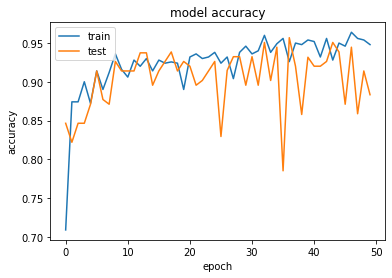

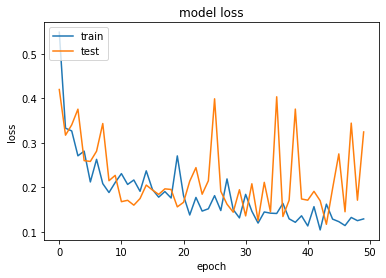

In [50]:
# visualization
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


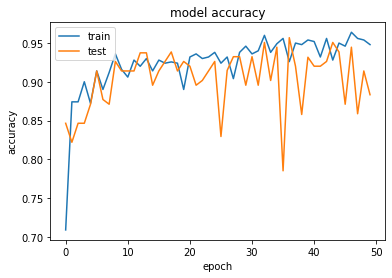

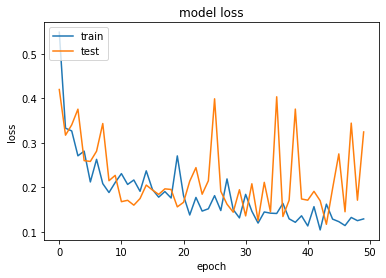

In [49]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Resources and Stretch Goals

Stretch goals
- Enhance your code to use classes/functions and accept terms to search and classes to look for in recognizing the downloaded images (e.g. download images of parties, recognize all that contain balloons)
- Check out [other available pretrained networks](https://tfhub.dev), try some and compare
- Image recognition/classification is somewhat solved, but *relationships* between entities and describing an image is not - check out some of the extended resources (e.g. [Visual Genome](https://visualgenome.org/)) on the topic
- Transfer learning - using images you source yourself, [retrain a classifier](https://www.tensorflow.org/hub/tutorials/image_retraining) with a new category
- (Not CNN related) Use [piexif](https://pypi.org/project/piexif/) to check out the metadata of images passed in to your system - see if they're from a national park! (Note - many images lack GPS metadata, so this won't work in most cases, but still cool)

Resources
- [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) - influential paper (introduced ResNet)
- [YOLO: Real-Time Object Detection](https://pjreddie.com/darknet/yolo/) - an influential convolution based object detection system, focused on inference speed (for applications to e.g. self driving vehicles)
- [R-CNN, Fast R-CNN, Faster R-CNN, YOLO](https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e) - comparison of object detection systems
- [Common Objects in Context](http://cocodataset.org/) - a large-scale object detection, segmentation, and captioning dataset
- [Visual Genome](https://visualgenome.org/) - a dataset, a knowledge base, an ongoing effort to connect structured image concepts to language